# RMixtComp: Iris example
Supervised clustering in basic modee and prediction

In [1]:
library(RMixtComp)

Loading required package: RMixtCompUtilities



## Data preparation
Import the Iris dataset included in the package. An `iris` object is then available.

In [2]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Rename the Species variable, describing classes, as `z_class`. Finding a variable with that name in the dataset, RMixtComp knows that it is supervised leaning.

In [3]:
names(iris)[5] = "z_class"

Split the dataset in train and test samples.

In [4]:
set.seed(42)
index <- sort(sample(nrow(iris), 30))
irisTrain <- iris[-index, ]
irisTest <- iris[index, -5]
partitionTestTrue <- iris[index, 5]

## Learning

In [5]:
resLearn <- mixtCompLearn(irisTrain, nClass = 3, nRun = 3)

You did not provide a model parameter.
Data are assumed to follow R standard and not MixtComp standard.
Models will be imputed as follows: "Gaussian" for numeric variable, "Multinomial" for character or factor variable and "Poisson" for integer variable.
If a variable is named "z_class" and its type is character, factor or integer, it will be used as "LatentClass".
 Sepal.Length   Sepal.Width  Petal.Length   Petal.Width       z_class 
   "Gaussian"    "Gaussian"    "Gaussian"    "Gaussian" "LatentClass" 
====== Run MixtComp in learn mode with 3 run(s) per number of classes and 2 core(s)
Data: 120 individuals and 5 variables.
-- K = 3
Run completed in 0.486s
Total runtime: 0.494s
Best model according to BIC: 3 clusters.


In [6]:
getType(resLearn, with.z_class = TRUE)

z_class  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
"LatentClass"    "Gaussian"    "Gaussian"    "Gaussian"    "Gaussian"

## Interpretation and visualization

In [7]:
summary(resLearn)

############### MixtCompLearn Run ###############
nClass: 3 
Criterion used: BIC 
            3
BIC -311.7240
ICL -325.7317
Best model: 3 clusters 
########### MixtComp Run ###########
Number of individuals: 120 
Number of variables: 4 
Number of clusters: 3 
Mode: learn 
Time: 0.01 s
SEM burn-in iterations done: 21/50 
SEM run iterations done: 21/50 
Observed log-likelihood: -249.4866 
BIC: -311.724 
ICL: -325.7317 
Discriminative power:
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
       0.899        0.859        0.457        0.226 
Proportions of the mixture:
0.333 0.342 0.325 
Parameters of the most discriminant variables:
- Petal.Width: Gaussian 
               mean    sd
k: setosa     0.238 0.104
k: versicolor 1.320 0.190
k: virginica  2.041 0.283
- Petal.Length: Gaussian 
               mean    sd
k: setosa     1.462 0.180
k: versicolor 4.256 0.445
k: virginica  5.615 0.551
- Sepal.Length: Gaussian 
               mean    sd
k: setosa     5.000 0.367
k: versicolor 5.980 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



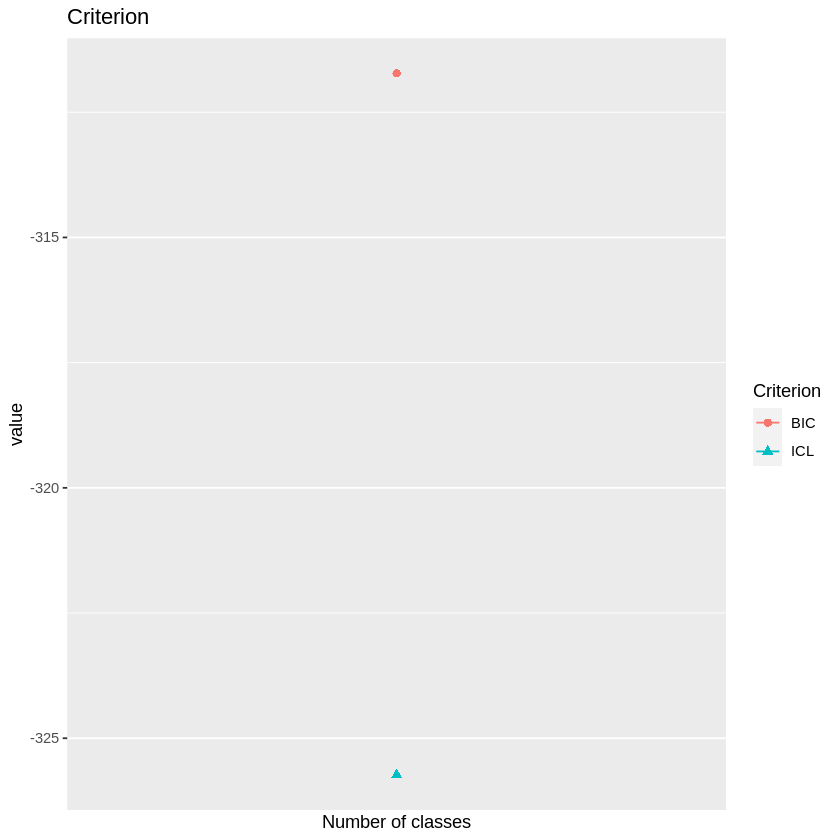

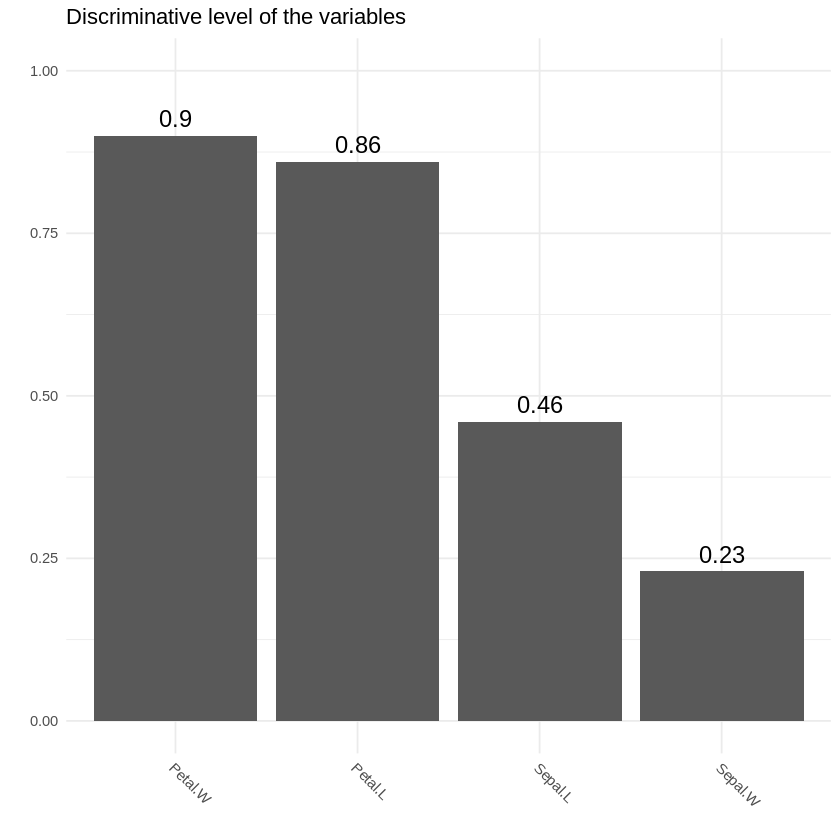

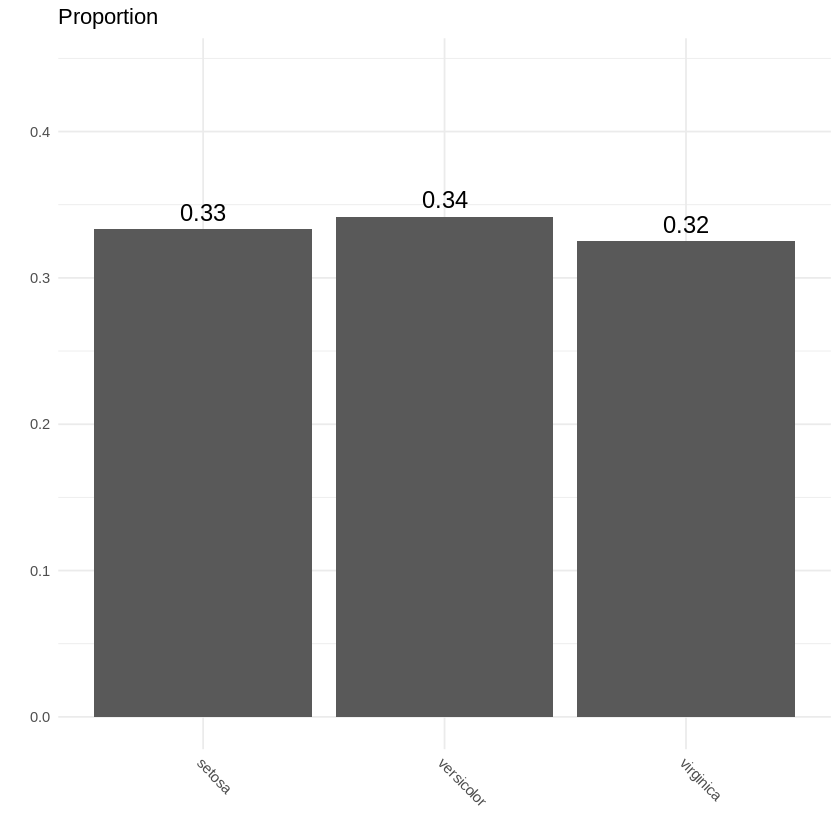

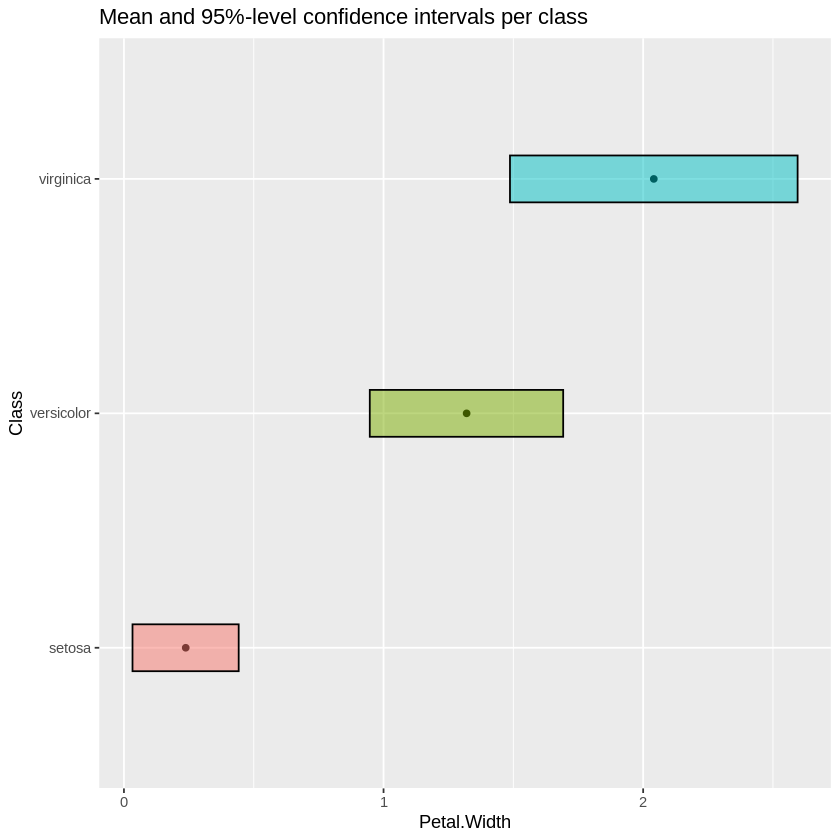

$criteria

$discrimPowerVar

$proportion

$Petal.Width

$Petal.Length

$Sepal.Length


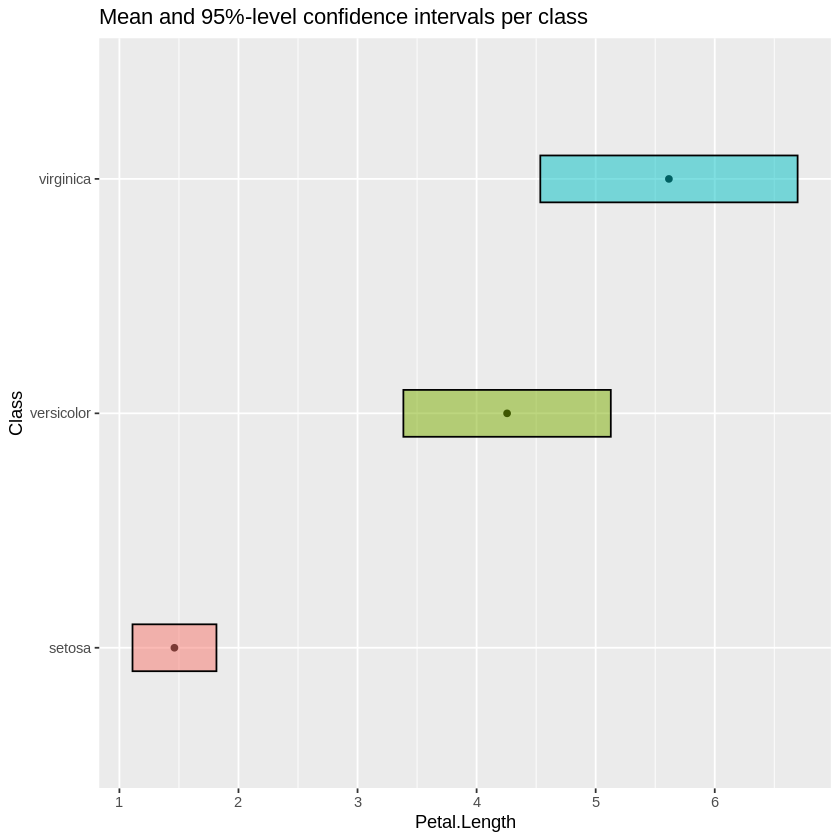

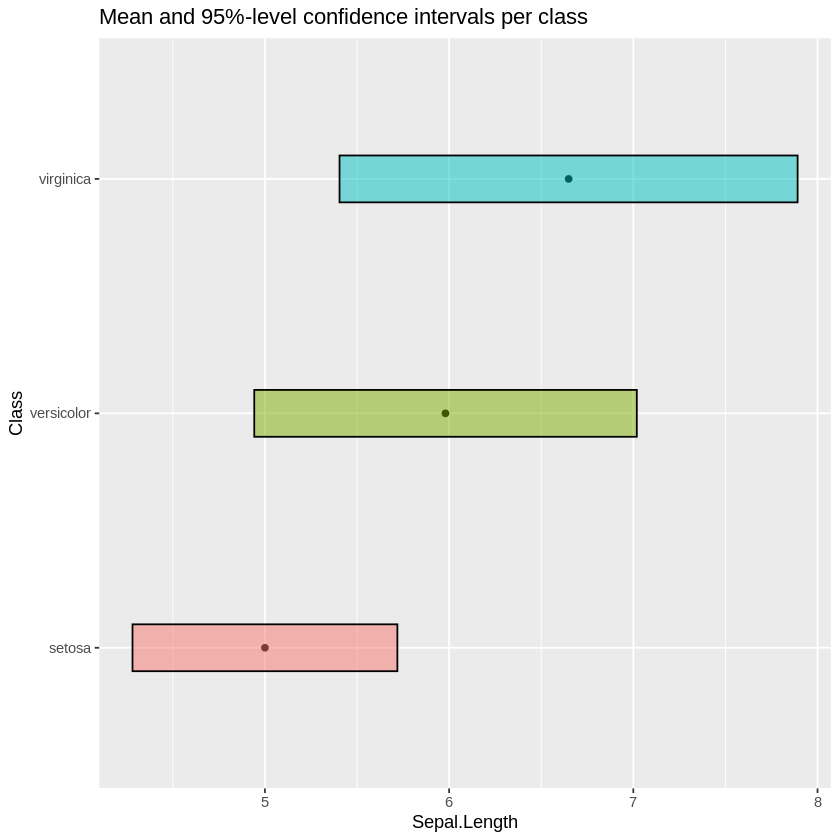

In [8]:
plot(resLearn)

## Prediction

In [9]:
resPredict <- mixtCompPredict(irisTest, resLearn = resLearn)

In [10]:
partitionTest <- getPartition(resPredict)
table(partitionTest, partitionTestTrue)

             partitionTestTrue
partitionTest setosa versicolor virginica
   setosa         10          0         0
   versicolor      0          8         0
   virginica       0          1        11

In [12]:
correctClassif <- mean(partitionTestTrue == partitionTest)
correctClassif

[1] 0.9666667

In [13]:
tik <- getTik(resPredict,log = FALSE)
round(tik[c(15, 21:25), ], 3)

0,0.622,0.378
0,0.000,1.000
0,0.000,1.000
0,0.000,1.000
0,0.011,0.989
0,0.011,0.989


In [14]:
empTik <- getEmpiricTik(resPredict)
empTik[c(15, 21:25), ]

k: setosa,k: versicolor,k: virginica
0,0.68,0.32
0,0.00,1.00
0,0.00,1.00
0,0.00,1.00
0,0.00,1.00
0,0.00,1.00


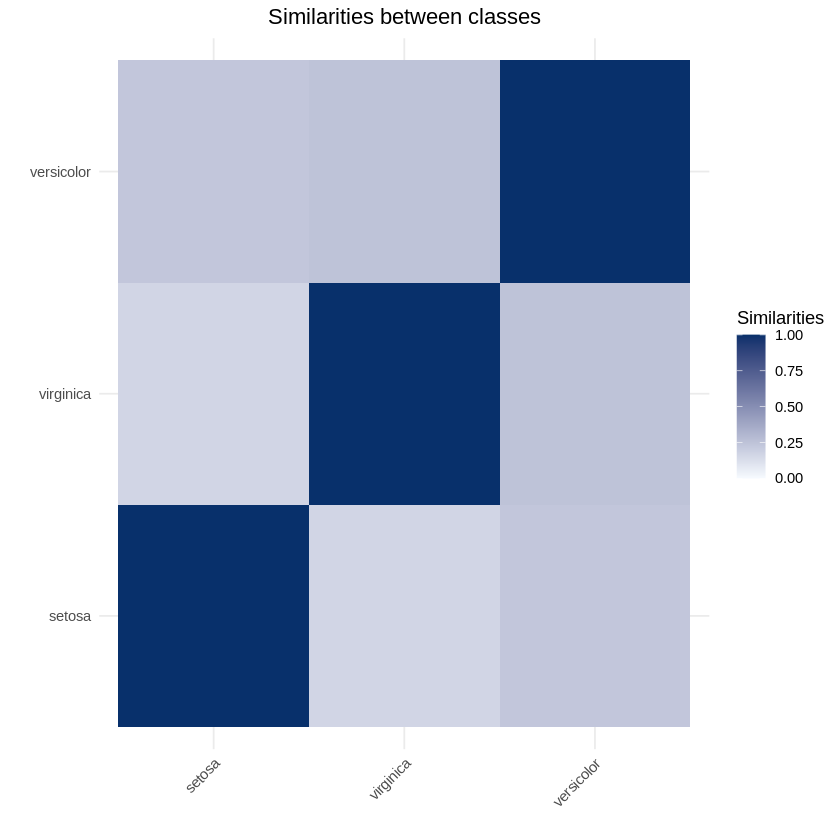

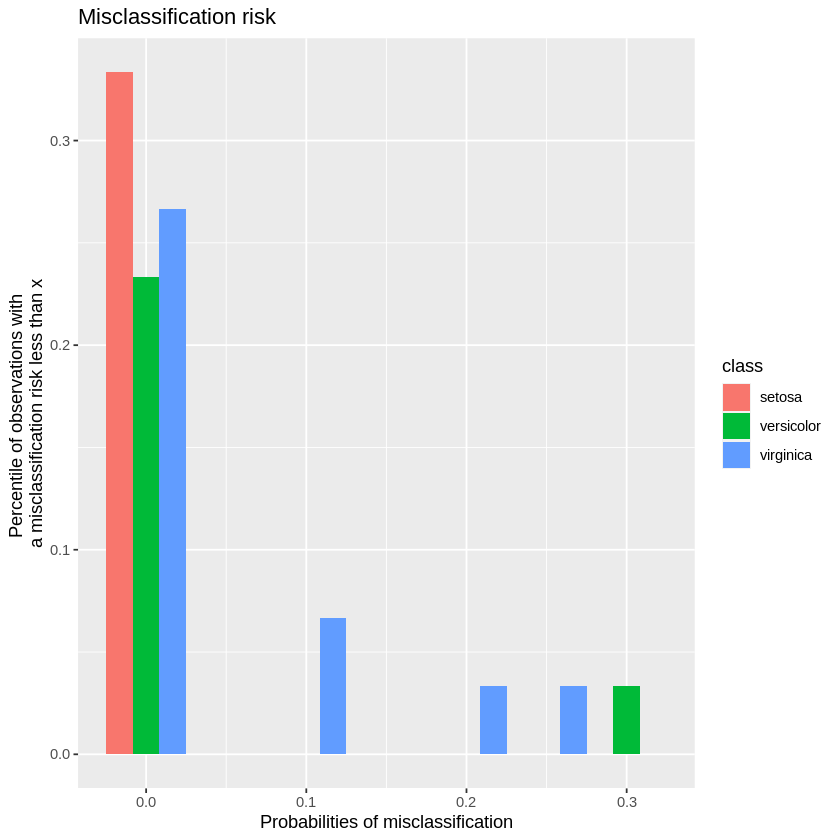

In [15]:
heatmapClass(resPredict)
histMisclassif(resPredict)$each